# <center> Lecture9 : Simple Normal Regression </center>  
 
## <center> Instructor: Dr. Hu Chuan-Peng </center> 

## Intro: 线性模型  

> ⭐从lec9开始，我们将重点介绍贝叶斯模型和统计分析方法的结合  

在lec9中，我们关注一个简单的线性模型  

* 假设在某公司中，每月的工资由固定工资和奖金组成，而影响奖金数高低的因素之一则是员工的业务数。  

* 在这个例子中，我们可以将每月的奖金数设为$Y$，业务数设为$X$，那么我们可以得到一串数据：  

$$  
\left\lbrace (Y_1,X_1), (Y_2,X_2),...,(Y_n,X_n) \right\rbrace  
$$  

* 我们可以使用线性模型来描述$Y$与$X$的关系，常见地，我们会将二者的关系写为：  

$$  
Y_i = \beta_0 + \beta_1 X_i + \epsilon \;\;\;\;\;\;\;\;\epsilon \sim N(0,\sigma^2)\\  
$$  

*($\beta_0$为截距，$\beta_1$为斜率，$\epsilon$为残差)*  
 

### Normal linear regression  

> ⭐我们也可以换一种方式来表达线性模型  

* <span style="color: orange;">预测值</span> $\mu_i$(即直线上橙色的点)可以写为：$\mu_i = \beta_0 + \beta_1 X_i\;\;\;(1)$  

* 从图上可以看到<span style="color: orange;">预测值</span>和<span style="color: gray;">实际值</span>(即灰色的散点)之间存在出入，实际值会在预测值附近波动  

* 那么实际值可以看作服从以$\mu_i$为均值，标准差为$\sigma$的正态分布，即：$Y_i \sim N(\mu_i, \sigma^2)\;\;\;(2)$  


![Image Name](https://cdn.kesci.com/upload/s3k1vv2eub.png?imageView2/0/w/960/h/960)  

*(改编自：https://saylordotorg.github.io/text_introductory-statistics/s14-03-modelling-linear-relationships.html)*




**Normal data model**  

将公式(1)(2)合并起来，则可以将传统的线性模型写成分布的形式：  
  



$$
\begin{align*}
Y_i &= \beta_0 + \beta_1 X_i + \epsilon \;\;\;\;\;\;\;\;\epsilon \sim N(0,\sigma^2)\\  
&\Downarrow \\
Y_i | \beta_0, \beta_1, \sigma &\stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i  .\\  
\end{align*}
$$

* 回归模型需满足如下假设：  

    1. 独立观测假设:每个观测值$Y_i$是相互独立的，即一个观测的值不受其他观测的影响  

    2. 线性关系假设: 预测值$\mu_i$和自变量$X_i$之间可以用线性关系来描述，即：$\mu_i = \beta_0 + \beta_1 X_i$  

    3. 方差同质性假设： 在任意自变量的取值下，观测值$Y_i$都会以$\mu_i$为中心，同样的标准差$\sigma$呈正态分布变化（$\sigma$ is consistent）





## 数据  

我们通过一个示例数据来理解线性回归模型，即业务数量对于奖金的影响。

- 我们使用 `pandas` 的 `read_csv` 方法来读取数据 `salary.csv` (数据已经预先存放在和鲸平台中)。
- 数据包含两个变量，`business` 表示业务数量，`bonus` 表示奖金。
- 每一行(index)表示一个员工。

In [14]:
import pandas as pd

# 通过 pd.read_csv 加载数据 salary.csv
df = pd.read_csv('./data/salary.csv', index_col=0)

# 显示部分数据
df.head()

,business,salary
index,,
0,64,654
1,49,1229
2,51,1454
3,52,1518
4,50,1362


我们可以进一步可视化数据情况  
* 我们使用 `seaborn` 的 `regplot` 方法来绘制回归图
* 其中横轴为业务数 `x="business"`，纵轴为奖金 `y="salary"`。
* 需要注意的是，`regplot` 方法会同时绘制**数据的散点图**以及**y关于x的回归线条**。

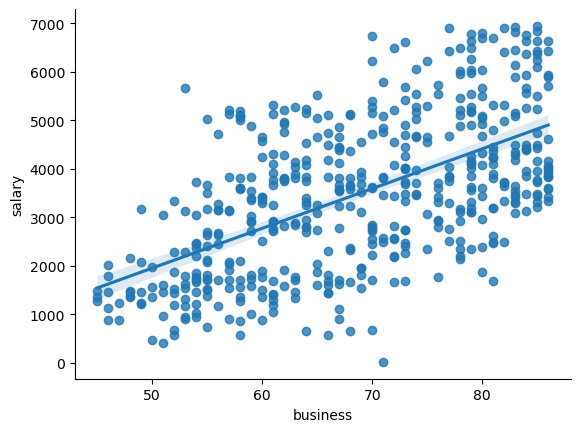

In [15]:
import pandas as pd
import seaborn as sns

# 使用 `regplot`方法可视化数据。data表示传入的数据，x为自变量，y为因变量。
sns.regplot(x="business", y="salary", data=df)
sns.despine()

## 定义先验  

从数据中可知，我们主要关注两个数据变量：薪资$Y$，业务数量$X$

$$
Y_i | \beta_0, \beta_1, \sigma \stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i
$$

而根据之前的模型公式(数据模型)可发现，存在三个未知的参数$\beta_0，\beta_1，\sigma$ 

* 在贝叶斯模型的框架下，我们需要为未知的参数指定先验：
 
$$  
Y_i \sim N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i  .\\  
$$  

$$  
\beta_0    \sim N\left(m_0, s_0^2 \right)  \\  
\beta_1   \sim N\left(m_1, s_1^2 \right) \\  
\sigma \sim \text{Exp}(l)  
$$  

> * 注：
> * 我们对参数有前提假设(assumptions):  * $\beta_0，\beta_1，\sigma$ 之间相互独立
> * 此外，规定 $\sigma$ 服从指数分布，以限定其值恒为正数 
> * 其中，$m_0，s_0，m_1，s_1$为超参数  
>    * 我们需要根据我们对$\beta_0$和$\beta_1$的先验理解来选择超参数的范围  
>    * 比如，$\beta_0$反映了业务数每增加1件，奖金增加的数量；$\beta_1$反映了业务数为0时，奖金数的值







**指定超参数**  

$$  
\begin{equation}  
\begin{array}{lcrl}  
\text{data:} & \hspace{.05in} &   Y_i | \beta_0, \beta_1, \sigma & \stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \;\; \text{ with } \;\; \mu_i = \beta_0 + \beta_1X_i \\  

\text{priors:} & & \beta_{0}  & \sim N\left(-2000, 1000^2 \right)  \\  
                    & & \beta_1  & \sim N\left(100, 40^2 \right) \\  
                    & & \sigma   & \sim \text{Exp}(0.0008)  .\\  
\end{array}  
\end{equation}  
$$  

这里，我们根据生活经验或直觉对超参数进行了定义：
- 我们假设 $\beta_1$ 服从正态分布，其均值为100，标准差为40。 代表了：
  * 业务数每增加1件，奖金增加的数量为100
  * 然而，这个增量是变化的，即，业务数每增加1件，奖金增加数量的范围大概在100 +/- 40
* 其次，我们假设 $\beta_0$ 服从正态分布，其均值为-2000，标准差为1000。 代表了：
  * 当业务数量X为0时，奖金数大概为-2000；
  * 当业务量为 X 为 20，并且 $\beta_1$ 为 100 时，根据公式 $\mu_i = \beta_0 + \beta_1X_i$，可以预测奖金 $\mu_i$ 大概为 -2000 + 100 * 20 = 0。
  * 然而，这个值是变化的，$\beta_0$ 大概范围为 -2000 +/- 1000。
* 最后，我们假设 $\sigma$ 服从指数分布，其参数为0.0008。 从下图可见，其范围在0到6000。
  * 这代表了，即使估计得到的 $\mu_i = 0$， 实际获得的奖金数可能在 0 +/- 6000 的范围内。

* 可视化指定超参下的先验：  

![Image Name](https://cdn.kesci.com/upload/s3ja8gf8aq.png?imageView2/0/w/960/h/960)







---

🤔显然有些同学可能认为这个先验的定义过于随意，甚至有些不靠谱。 那我们是否可以检验先验的合理性，以及适当的调整这个先验呐？

**我们通过代码来说明，如何根据超参来定义回归模型的先验，以及进行先验预测检验**

首先根据公式定义先验模型：

$$
\begin{align*}
\text{priors:} & & \beta_{0}  & \sim N\left(-2000, 1000^2 \right)  \\  
                    & & \beta_1  & \sim N\left(100, 40^2 \right) \\  
                    & & \sigma   & \sim \text{Exp}(0.0008)  .\\  
\end{align*}
$$

In [16]:
# 导入 pymc 模型包，和 arviz 等分析工具 
import pymc as pm
import arviz as az
import seaborn as sns
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子确保结果可以重复
np.random.seed(84735)

In [17]:
with pm.Model() as linear_model:

    #===========================
    #     定义模型先验
    #===========================
    #定义beta_0：假设其均值为 -2000，标准差为 1000
    beta_0 = pm.Normal("beta_0", mu=-2000, sigma=1000)  
    #定义beta_1：假设其均值为 100，标准差为 40                  
    beta_1 = pm.Normal("beta_1", mu=100, sigma=40)  
    #定义sigma： 设置其参数为 0.0008           
    sigma = pm.Exponential("sigma", 0.0008)   

然后根据数据定义数据模型：

$$
\begin{align*}
X &= df.business \\
\mu_i &= \beta_0 + \beta_1X_i \\
\hspace{.05in} Y_i | \beta_0, \beta_1, \sigma &\stackrel{ind}{\sim} N\left(\mu_i, \sigma^2\right) \\
Y &= df.salary \\
\end{align*}
$$

In [18]:
with linear_model:

    #===========================
    #     定义数据似然模型
    #===========================
    
    # 设置自变量数据，x是我们的自变量业务数
    x = pm.Data("x",df.business, mutable=False)                 
    # 定义mu，自变量与先验结合
    mu = beta_0 + beta_1 * x                                    
    #定义似然：预测值y符合N(mu, sigma)分布
    #通过 observed 传入我们收集到的实际数据y=df.salary
    likelihood = pm.Normal("y_est", mu=mu, sigma=sigma, 
        observed=df.salary)     

先验预测检验(Prior Predictive Check)  


我们可以通过**先验预测检验**来初步判断先验的设定是否合理。  

* 1. 在先验中随机抽取200组$\beta_0, \beta_1$值  
* 2. 生成假数据自变量X，  
* 3. 生成200条 $\beta_0 + \beta_1 X$, 观察其中的预测值是否处在合理的范围内

In [19]:
# 1. 在先验中随机抽取200组$\beta_0, \beta_1$值 
with linear_model:
    prior_pred = pm.sample_prior_predictive(samples=200, random_seed=84735)

Sampling: [beta_0, beta_1, sigma, y_est]


查看先验预测的抽取结果，结果储存在变量prior中

* 变量的类型为 xarray，类似于 numpy 的 array。
* 区别在于，xarray 支持多维数组。例如，pymc 返回的结果包括不同的MCMC链chains 和采样draw。
  * 这样，我们可以更容易的提取某一条指定MCMC链中的某些采样。
* 为了方便查看，我们也可以使用 .to_dataframe() 将其转化为 pandas DataFrame。
  * 可以看到，该数据框包含三个变量：beta_0, beta_1, sigma。并且包含两个索引：chain 和 draw。

In [20]:
# 查看先验预测的抽取结果，可以发现结果储存在prior中
prior_pred.prior

<xarray.Dataset>
Dimensions:  (chain: 1, draw: 200)
Coordinates:
  * chain    (chain) int32 0
  * draw     (draw) int32 0 1 2 3 4 5 6 7 8 ... 192 193 194 195 196 197 198 199
Data variables:
    beta_1   (chain, draw) float64 63.99 112.0 67.21 18.48 ... 121.9 61.19 89.69
    beta_0   (chain, draw) float64 -3.688e+03 -1.353e+03 ... -1.637e+03
    sigma    (chain, draw) float64 127.2 629.7 1.358e+03 ... 524.4 376.0 44.27
Attributes:
    created_at:                 2023-11-04T06:56:41.564741
    arviz_version:              0.14.0
    inference_library:          pymc
    inference_library_version:  5.6.1

In [21]:
prior_pred.prior.to_dataframe()

beta_1       beta_0        sigma
chain draw                                      
0     0      63.987382 -3688.395615   127.204192
      1     112.025358 -1352.656738   629.661463
      2      67.213871 -2425.557338  1357.564899
      3      18.477074 -2294.051877   848.229424
      4     154.178177 -2808.190392  3446.639992
...                ...          ...          ...
      195   140.474568 -3476.308779   895.293046
      196   173.858054  -419.736484  1012.343216
      197   121.945168 -2481.309222   524.444138
      198    61.190321 -1573.304283   376.027664
      199    89.690396 -1636.581401    44.272728

[200 rows x 3 columns]

2. 生成假数据自变量X
   
- 这里我们根据现实情况来定义X的取值范围
- 考虑到每个员工大概能完成 45-90项业务，因此我们将X的范围设置在45-90
- 我们使用 `np.arange`设置业务的数量:
- 最后，我们通过 xr.DataArray将 x_sim 转化为 xarray，方便使用 X 进行后续计算
  - 这是因为 pymc 返回的数据为 InferenceData，其基于 xarray 而不是 numpy。


In [22]:
import xarray as xr

# 通过np.arange设置业务数量，从 45,46...90。
x_sim = np.arange(start=45,stop=91,step=1)
# 用 xr.DataArray将 x_sim 转化为 xarray，是为了匹配数据类型
x_sim = xr.DataArray(x_sim) 

x_sim

<xarray.DataArray (dim_0: 46)>
array([45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
       79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90])
Dimensions without coordinates: dim_0

3. 根据公式 $\mu = \beta_0 + \beta_1 X$ 生成200名员工的数据, 观察其中的预测值(薪资)是否处在合理的范围内

- 注意，我们有200次采样，每次采样对应三个参数 beta_0, beta_1, sigma。
- 我们需要根据每次采样，生成200名员工的数据。
- 因此，我们最后的结果包含dim_0(代表X项目数量), chain, draw三个索引。
- 最后，我们获得了 dim_0 * chain * draw = 46 * 200 * 1 = 9000 个预测值。

In [23]:
#先验抽取的结果存储在prior_pred.prior中，将其提取出来，并代入公式
y_sim = prior_pred.prior["beta_0"] + prior_pred.prior["beta_1"] * x_sim

y_sim.to_dataframe(name="salary")

salary
chain draw dim_0             
0     0    0      -808.963414
           1      -744.976032
           2      -680.988650
           3      -617.001268
           4      -553.013886
...                       ...
      199  41     6076.792619
           42     6166.483015
           43     6256.173410
           44     6345.863806
           45     6435.554202

[9200 rows x 1 columns]

### 可视化预测结果

- 每一条线代表一次抽样，因此我们绘制了200条线。
- 我们可以观测到薪水(纵坐标)的范围随着业务数量(横坐标)的变化。
- 例如，完成90项业务的薪资范围大概在

> 这个先验范围大致可以反应真实的情况。
> 需要注意的是：
> * 我们提供了一个**弱信息**的先验，因此很多情况下，薪资可能为负数。
> * 但当我们提供数据时，这个范围会更接近真实，因此我们不必过于担心员工的薪资真的为负数😜。
> * 相反，如果我们设置一个强信息先验，那么先验预测的结果可能更符合现实，但当数据加入模型时，模型可能并不能反映真实的数据。

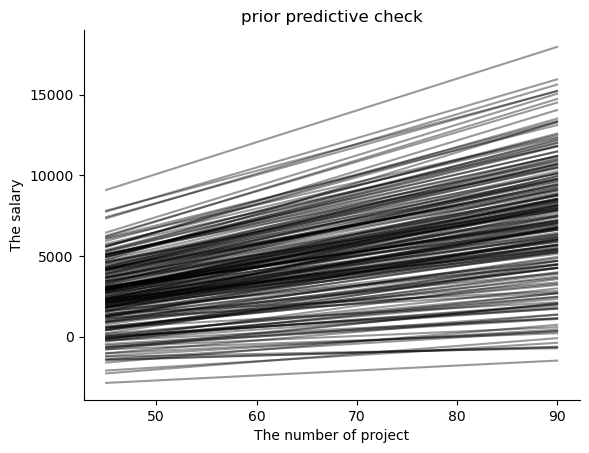

In [24]:
# 为了画图时反应所有链合并的结果，将y_sim的chain和draw融合到一起
y_sim_re = y_sim.stack(sample=("chain", "draw"))

plt.plot(x_sim, y_sim_re, c="k", alpha=0.4)
plt.title("prior predictive check")
plt.xlabel("The number of project")
plt.ylabel("The salary")
sns.despine()

## 后验分布  

### 模型定义  

现在，我们可以结合数据与先验，为参数$(\beta_0, \beta_1, \sigma)$生成后验模型  

* 在lec7中我们已经知道，当后验分布过于复杂时，可以使用MCMC来近似后验分布  

    * 我们使用pymc来完成采样过程  


在这之前，我们回顾之前对先验与似然的定义： 

* > $Y_i {\sim} N\left(\mu_i, \sigma^2\right)$  

* > $\beta_{0}   \sim N\left(-2000, 1000^2 \right)$  

* > $\beta_1   \sim N\left(100, 40^2 \right)$  

* > $\mu_i = \beta_0 + \beta_1X_i$  

* > $\sigma   \sim \text{Exp}(0.0008)$  


In [25]:
with pm.Model() as linear_model:

    beta_0 = pm.Normal("beta_0", mu=-2000, sigma=1000)          #定义beta_0          
    beta_1 = pm.Normal("beta_1", mu=100, sigma=40)              #定义beta_1
    sigma = pm.Exponential("sigma", 0.0008)                     #定义sigma

    x = pm.Data("x",df.business, mutable=False)                 #x是我们的自变量业务数

    mu = beta_0 + beta_1 * x                                    #定义mu，讲自变量与先验结合

    likelihood = pm.Normal("y_est", mu=mu, sigma=sigma, observed=df.salary)     #定义似然：预测值y符合N(mu, sigma)分布
                                                                                #通过 observed 传入我们收集到的实际数据y

### 后验模拟  

1. 接下来我们使用`pm.sample()`进行mcmc采样  

* 我们指定了4条马尔科夫链，保留的采样数为5000，对于每一个参数，在每条链上都有5000个采样结果  

    * $\left\lbrace \beta_0^{(1)}, \beta_0^{(2)}, \ldots, \beta_0^{(5000)} \right\rbrace$  

    * $\left\lbrace \beta_1^{(1)}, \beta_1^{(2)}, \ldots, \beta_1^{(5000)} \right\rbrace$  
    
    * $\left\lbrace \sigma_1^{(1)}, \sigma_1^{(2)}, \ldots, \sigma_1^{(5000)} \right\rbrace$  


In [26]:
with linear_model:
    trace = pm.sample(draws=5000,                   # 使用mcmc方法进行采样，draws为采样次数
                      tune=5000,                    # tune为调整采样策略的次数，可以决定这些结果是否要被保留
                      chains=4,                     # 链数
                      discard_tuned_samples= True,  # tune的结果将在采样结束后被丢弃
                      random_seed=84735)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_0, beta_1, sigma]


Sampling 4 chains for 5_000 tune and 5_000 draw iterations (20_000 + 20_000 draws total) took 43 seconds.
d:\01Redirect\04miniconda\envs\pymc5_3.11\Lib\site-packages\arviz\utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


2. 在采样结束之后，我们得到采样样本 trace 
- 后验样本在`trace.posterior`中，它的数据类型为之前介绍的 xarray。
  - 包括了两个维度(索引)，第一个维度为链chain，第二个维度为采样draw
  - 我们可以使用 trace.posterior['beta_0']提取后验中的$\beta_0$参数
  - 我们可以使用 trace.posterior['beta_0'][0, 10]提取$\beta_0$第一条连中第10个采样值

In [27]:
trace.posterior

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 5000)
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4 5 6 7 ... 4993 4994 4995 4996 4997 4998 4999
Data variables:
    beta_0   (chain, draw) float64 -2.016e+03 -2.051e+03 ... -2.016e+03
    beta_1   (chain, draw) float64 79.78 79.26 83.2 83.2 ... 91.36 77.01 80.63
    sigma    (chain, draw) float64 1.3e+03 1.299e+03 ... 1.282e+03 1.304e+03
Attributes:
    created_at:                 2023-11-04T06:57:26.842278
    arviz_version:              0.14.0
    inference_library:          pymc
    inference_library_version:  5.6.1
    sampling_time:              42.772866010665894
    tuning_steps:               5000

In [28]:
trace.posterior['beta_0']

<xarray.DataArray 'beta_0' (chain: 4, draw: 5000)>
array([[-2015.6008758 , -2051.21571258, -2160.60423724, ...,
        -1339.4661947 , -1409.42971576, -2229.35754122],
       [-1468.19396022, -2550.67822859, -2447.22806348, ...,
        -2536.34068404, -2509.29597271, -2543.22911577],
       [-2205.63093014, -2120.80328836, -1891.39460996, ...,
        -2319.24941429, -1997.83954228, -2161.3820191 ],
       [-2581.91028247, -2468.07355694, -2041.42576522, ...,
        -2660.37230621, -1798.38419885, -2016.32449458]])
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4 5 6 7 ... 4993 4994 4995 4996 4997 4998 4999

In [29]:
trace.posterior['beta_0'][0, 10]

<xarray.DataArray 'beta_0' ()>
array(-1689.48251135)
Coordinates:
    chain    int32 0
    draw     int32 10

我们同样可以使用`az.plot_trace()`可视化后验分布

d:\01Redirect\04miniconda\envs\pymc5_3.11\Lib\site-packages\arviz\utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'beta_0'}>,
        <Axes: title={'center': 'beta_0'}>],
       [<Axes: title={'center': 'beta_1'}>,
        <Axes: title={'center': 'beta_1'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

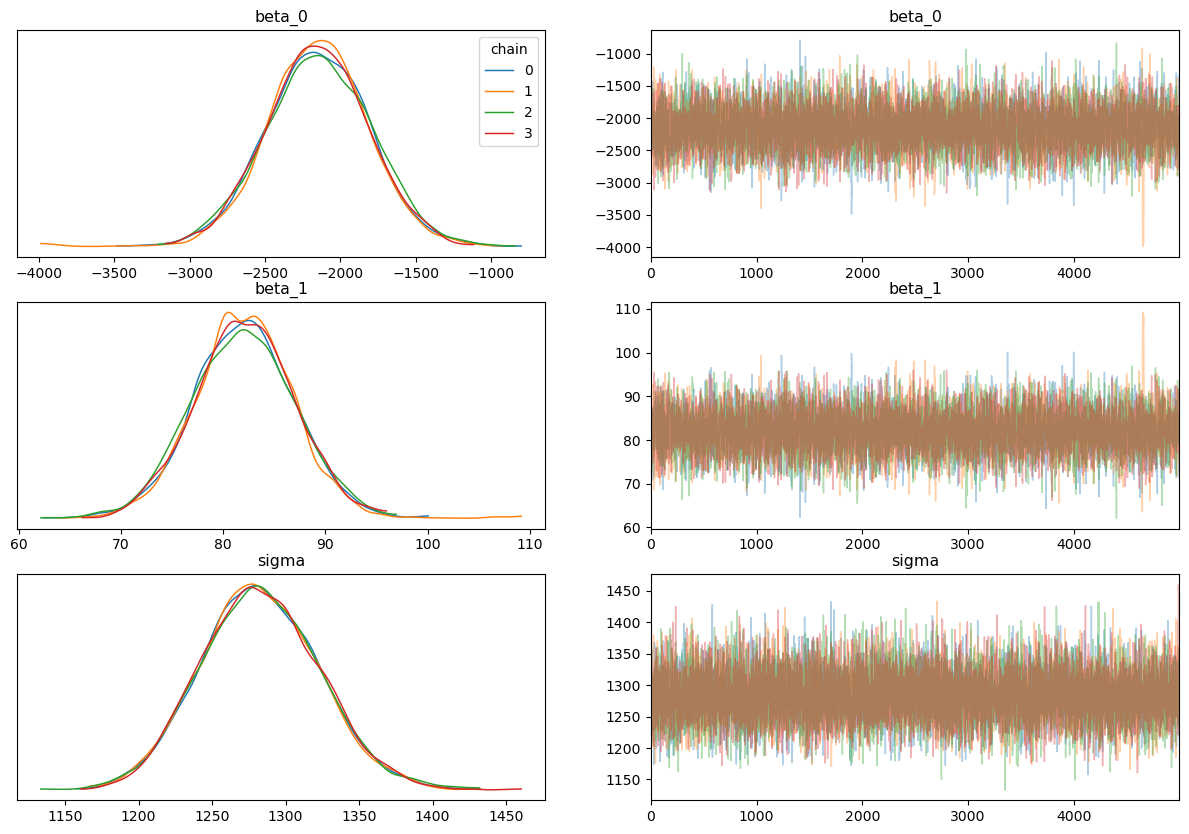

In [30]:
az.plot_trace(trace, figsize=(15,10),compact=False,legend=True)

## 解释后验  

我们共得到20000对$\beta_0$和$\beta_1$值，可以通过`az.summary()`总结参数的基本信息
- 这其中包括了对于模型的诊断信息 ess_bulk 和 r_hat (当然你可以结合可视化进行诊断)。
- 同时该结果也包含了参数的均值和HDI。

In [26]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_0,-2149.821,340.295,-2778.948,-1502.653,4.294,3.112,6452.0,7690.0,1.0
beta_1,82.060,4.903,72.738,91.141,0.062,0.044,6438.0,7660.0,1.0
sigma,1282.666,40.275,1208.710,1359.259,0.404,0.286,9886.0,8739.0,1.0


* 我们可以使用均值来理解生成的后验分布，通过上表我们知道  
	*  $\beta_0$= -2147.93 *(业务数为0时的奖金数，意义不大在此不考虑)*  
	*  $\beta_1$ = 82.03  
	*  我们可以将其解释为，业务数每增加1件，奖金数增加82.03元  

* 但从上表我们也知道参数的后验分布存在不确定性，参数均值生成的回归线只是其中之一  
	* 那么我们可以通过20000对参数值 生成20000条回归线

### 练习

根据 [先验预测检验可视化预测结果]的思路，对于后验预测结果进行可视化。

1. 设置自变量(业务数量)范围为，45-90。
2. 根据 20000对参数，与自变量进行组合，生成了20000条回归线
3. 绘制后验预测结果

![Image Name](https://cdn.kesci.com/upload/s3k7tyn6yi.png?imageView2/0/w/960/h/960)  

In [ ]:
##---------------------------------------------------------------------------
#      设置自变量范围：通过np.arange设置业务数量，从 45,46...90。
#---------------------------------------------------------------------------
x_value = ...

##---------------------------------------------------------------------------
#      20000对参数与自变量进行组合，生成了20000条回归线
#      提示：y_model = beta_0 + beta_1 * x
#---------------------------------------------------------------------------
y_model = ...



## 为了画图时反应所有链合并的结果，将y_sim的chain和draw融合到一起
y_sim_re = y_model.stack(sample=("chain", "draw"))

# 绘制回归线条
plt.plot(x_sim, y_sim_re, c="k", alpha=0.01, label="posterior prediction")
# 绘制真实数据的散点图
plt.scatter(trace.constant_data.x,trace.observed_data.y_est,c="r", label="observed data")

# 设置标题等
plt.title("posterior predictive check")
plt.xlabel("The number of project")
plt.ylabel("The salary")
plt.legend()
sns.despine()

## 后验预测分布  

> 回归模型的参数除了可以帮助我们理解自变量与因变量的关系，还可以帮助我们做出预测  

❓预测问题如：小a本月完成的业务数为75，则小a本月的奖金可能是多少  

* 若我们以参数的后验均值($\beta_0 = -2147.93$, $\beta_1=82.03$ )进行预测  

$$  
-2147.93 + 82.03 * 75 =  4004.32  
$$  

* 但在lec8中我们知道后验预测中存在 采样变异和参数变异  

    * 在这个例子中，采样变异指的是业务数为75的员工并不总是会得到相同的奖金  
    
    * 而参数变异指的是，后验分布并没有指定唯一的参数  

* 在lec8中，我们知道，可以通过遍历所有参数组合下，所有事件发生可能性的求和平均来生成后验预测分布  
$$  
f\left(y_{\text{new}} | \vec{y}\right) = \int\int\int f\left(y_{new} | \beta_0,\beta_1,\sigma\right) f(\beta_0,\beta_1,\sigma|\vec{y}) d\beta_0 d\beta_1 d\sigma .  
$$  

😥但这也太抽象了...  


### 通过MCMC采样值理解后验预测分布  


* 通过MCMC采样，三个参数各获得了20000个采样值$\left(\beta_0^{(i)},\beta_1^{(i)},\sigma^{(i)}\right)$  

* 当X = 75时，每一组参数值都可以指定一个预测值$Y$可能符合的正态分布，我们可以从该正态分布中抽取一个预测值$Y_{new}$  

>    以i = 1 和 i = 20 的情况为例  

$$  
Y_{\text{new}}^{(i)} | \; \sim \; N\left(\mu^{(i)}, \left(\sigma^{(i)}\right)^2\right) \;\; \text{ with } \;\; \mu^{(i)} = \beta_0^{(i)} + \beta_1^{(i)} \cdot 75.  
$$  


![Image Name](https://cdn.kesci.com/upload/s3k3u2azj4.png?imageView2/0/w/960/h/960)  


**使用代码模拟单次后验预测**  

* 我们有20000组参数值，就能得到20000个预测值$Y$可能符合的正态分布，并抽取出20000个预测值$Y_{new}$  

* 这20000个预测值$Y_{new}$就构成了X = 75时，$Y$的后验预测分布  

$$  
\left[  
\begin{array}{lll}  
\beta_0^{(1)} & \beta_1^{(1)} & \sigma^{(1)} \\  
\beta_0^{(2)} & \beta_1^{(2)} & \sigma^{(2)} \\  
\vdots & \vdots & \vdots \\  
\beta_0^{(20000)} & \beta_1^{(20000)} & \sigma^{(20000)} \\  
\end{array}  
\right]  
\;\; \longrightarrow \;\;  
\left[  
\begin{array}{l}  
Y_{\text{new}}^{(1)} \\  
Y_{\text{new}}^{(2)} \\  
\vdots \\  
Y_{\text{new}}^{(20000)} \\  
\end{array}  
\right]  
$$  

* 我们先用代码来模拟单次完整的抽取过程

In [59]:
# 采样得到的参数后验分布都储存在 trace.posterior中，我们进行一些提取操作
pos_sample = trace.posterior.stack(sample=("chain", "draw"))

# 将每个参数的20000次采样结果存储在数据框中
df_pos_sample = pd.DataFrame({"beta_0": pos_sample["beta_0"].values,
                              "beta_1": pos_sample["beta_1"].values,
                              "sigma": pos_sample["sigma"].values})

# 查看参数
df_pos_sample.head()

,beta_0,beta_1,sigma
0,-2015.600876,79.775674,1299.691339
1,-2051.215713,79.259602,1298.898045
2,-2160.604237,83.202084,1211.492341
3,-2170.113868,83.200558,1211.855340
4,-2209.264426,82.364265,1214.898706


In [73]:
# 抽取第一组参数组合，生成正态分布的均值
row_i = 0  # 抽取第一行
X_i = 75   # 假设业务数量为 75
mu_i = df_pos_sample.beta_0[row_i] + df_pos_sample.beta_1[row_i] * X_i           
sigma_i = df_pos_sample.sigma[row_i]

# 从正态分布中随机抽取一个值，作为预测值
prediction_i = np.random.normal(
  loc = mu_i,                                            
  scale= sigma_i, 
  size=1)

# 你可以运行该代码块多次，以比较在相同参数下，预测值的变化。
print(f"mu_i: {mu_i:.2f}, 预测值：{prediction_i[0]:.2f}")

mu_i: 3967.57, 预测值：2151.62


**使用代码模拟多次后验预测**  

* 通过上述四行代码，我们已经进行了一次完整的后验预测  
* 我们可以写一个循环，重复这个过程20000次
* 最后的结果中，每一行代表一种参数对；mu 为预测的均值，y_new 为实际生成的预测值。

In [74]:
# 生成两个空列，用来储存每一次生成的均值mu，和每一次抽取的预测值y_new
df_pos_sample['mu'] = np.nan
df_pos_sample['y_new'] = np.nan

# 将之前的操作重复20000次
for row_i in range(len(df_pos_sample)):
    mu_i = df_pos_sample.beta_0[row_i] + df_pos_sample.beta_1[row_i] * 75
    df_pos_sample["mu"][row_i] = mu_i
    df_pos_sample["y_new"][row_i] = np.random.normal(loc = mu_i,
                                            scale= df_pos_sample.sigma[row_i],
                                            size=1)

In [75]:
df_pos_sample

,beta_0,beta_1,sigma,mu,y_new
0,-2015.600876,79.775674,1299.691339,3967.574657,3926.484010
1,-2051.215713,79.259602,1298.898045,3893.254465,2691.602795
2,-2160.604237,83.202084,1211.492341,4079.552091,4018.939544
3,-2170.113868,83.200558,1211.855340,4069.927993,4308.435556
4,-2209.264426,82.364265,1214.898706,3968.055433,4465.251422
...,...,...,...,...,...
19995,-2793.535608,90.626329,1343.587517,4003.439041,1921.658480
19996,-2811.691304,89.623863,1341.604347,3910.098413,2337.480777
19997,-2660.372306,91.361013,1322.893609,4191.703702,3708.200807
19998,-1798.384199,77.006771,1282.226492,3977.123647,5590.721226


**绘制后验预测分布**  

根据刚刚生成的数据，我们可以分别绘制出 $\mu$ 与 $Y_{new}$ 的后验预测分布图

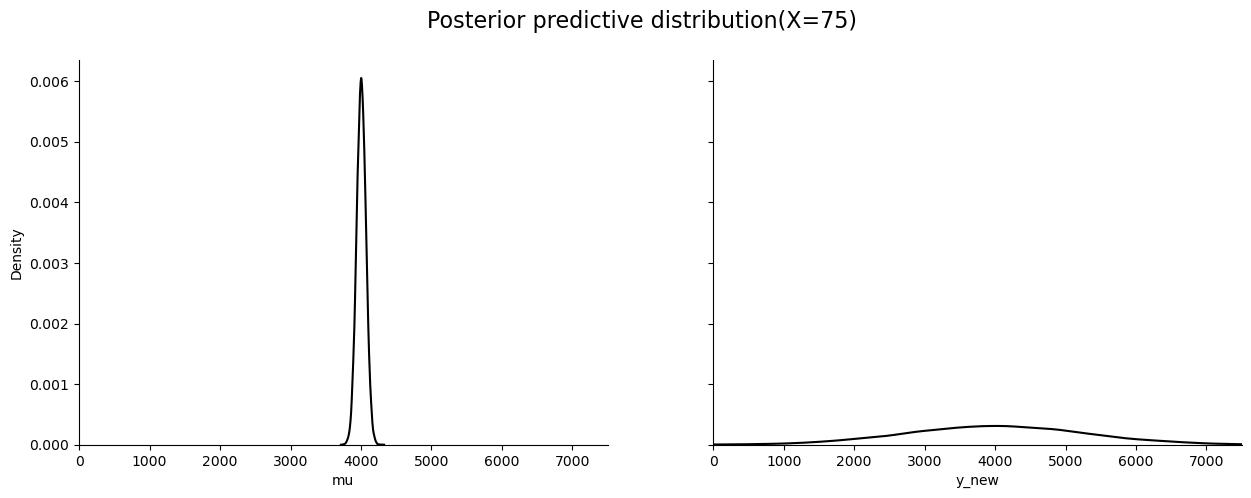

In [76]:
#新建画布
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True, sharex=True)        

#在第一个画布中绘制出生成的mu的分布
sns.kdeplot(data=df_pos_sample,                                                
            x="mu", 
            color="black",
            ax=axs[0])

axs[0].set_xlim(0, 7500)

#在第二个画布中绘制出生成的y_new的分布
sns.kdeplot(data=df_pos_sample,                                                 
            x="y_new", 
            color="black",
            ax=axs[1])

fig.suptitle('Posterior predictive distribution(X=75)', fontsize=16)
sns.despine()

从上图可以看到， $Y_{new}$ 分布的不确定性远大于 $\mu$ 分布的不确定性  

同样可以画出二者95%的可信区间  

![Image Name](https://cdn.kesci.com/upload/s3k4s5j1c6.png?imageView2/0/w/960/h/960)

### 使用pymc生成后验预测分布

同上节课介绍的一样，通过 `pymc.sample_posterior_predictive`方法可以快速从模型生成后验预测数据。

In [77]:
with linear_model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True)

Sampling: [y_est]


接着，我们可以使用 arviz 提供的后验预测检查函数 `plot_ppc`来绘制结果。
- 黑色线条代表观测值(薪资)总体的分布情况。
- 蓝色线代表每一对采样参数对应的后验预测的分布情况。
- 橙色为后验预测的均值的分布情况

<Axes: xlabel='y_est / y_est'>

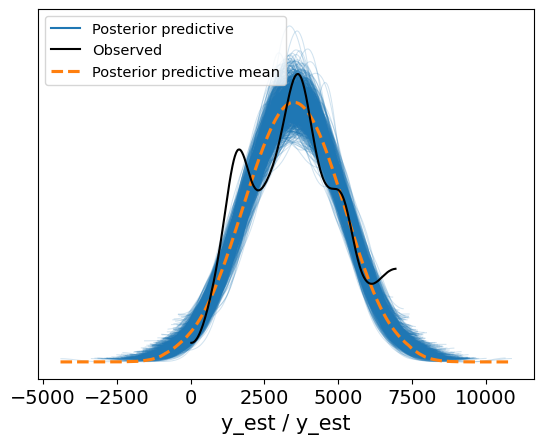

In [78]:
az.plot_ppc(trace, num_pp_samples=1000)

In [ ]:
# az.plot_lm(trace, num_pp_samples=1000)

## 使用bambi进行模型定义

Bambi 是一个用于贝叶斯统计建模的 Python 包，建立在 PyMC 上。

```pyhon
model = bmb.Model('salary ~ business', 
                  data=df,
                  dropna=True)
```

* 它提供了一个更加简化的界面，使得使用贝叶斯统计模型更加容易，特别是在处理线性和广义线性混合模型时。
* 上面的代码提供了一个示例，我们可以简单的三行代码来完成之前的回归模型的定义。
* 其中，我们可以通过 lme4 的形式来表达线性关系：`'salary ~ business'`。~左边是因变量，右边是自变量。例如还有其他变量(如time)可以扩展写为`'salary ~ business + time'`。
* 需要注意的是，在bambi中，如果我们不对先验进行定义，它会自动选择一个比较弱(weakly informative)的先验。

我们通过代码示例来说明如何通过 bambi 复现之前的分析：

1. 首先定义模型

In [2]:
import bambi as bmb

#定义先验并传入模型中
intercept_prior = bmb.Prior("Normal", mu=-2000, sigma=1000)     #对应beta_0
business_prior = bmb.Prior("Normal", mu=100, sigma=40)          #对应beta_1
sigma_prior = bmb.Prior("Exponential", lam = 0.0008)            #对应sigma

# 将三个参数的先验定义在字典prior中
priors = {"Intercept": intercept_prior, 
          "business": business_prior,
          "sigma": sigma_prior}

#定义关系式，传入数据
model = bmb.Model('salary ~ business', 
                  data=df,
                  priors=priors,
                  dropna=True)
#总结对模型的设置
model

       Formula: salary ~ business
        Family: gaussian
          Link: mu = identity
  Observations: 500
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: -2000.0, sigma: 1000.0)
            business ~ Normal(mu: 100.0, sigma: 40.0)
        
        Auxiliary parameters
            sigma ~ Exponential(lam: 0.0008)

2. 拟合模型，即使用MCMC方法采样得到后验的近似分布

In [111]:
# 采样
trace = model.fit(draws=5000, 
                    tune=5000,
                    chains=4,
                    random_seed=84735)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [salary_sigma, Intercept, business]


Sampling 4 chains for 5_000 tune and 5_000 draw iterations (20_000 + 20_000 draws total) took 96 seconds.


模型诊断部分的分析和之前直接使用 pymc 是一致的。

array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'business'}>,
        <Axes: title={'center': 'business'}>],
       [<Axes: title={'center': 'salary_sigma'}>,
        <Axes: title={'center': 'salary_sigma'}>]], dtype=object)

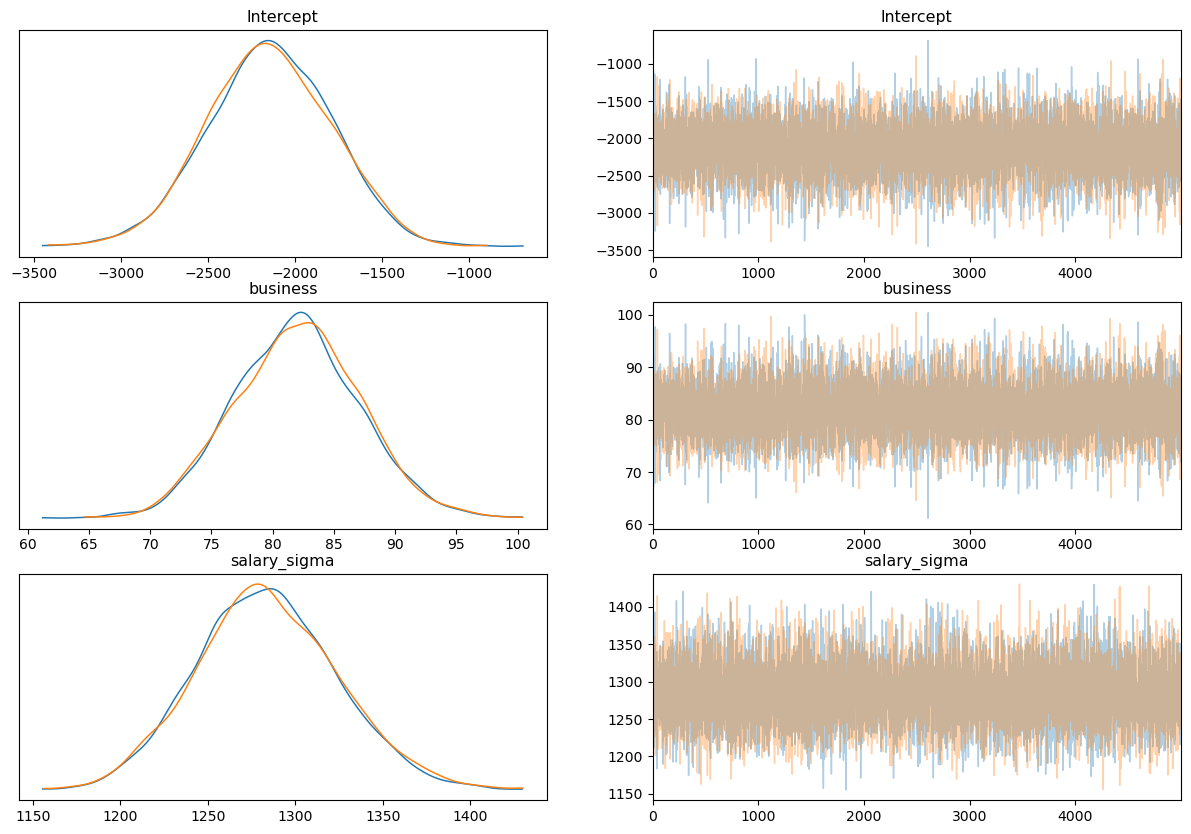

In [96]:
az.plot_trace(trace, figsize=(15,10), compact=False)

In [97]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-2145.134,356.513,-2804.202,-1476.367,3.125,2.254,13034.0,7385.0,1.0
business,81.982,5.126,72.404,91.515,0.045,0.032,13158.0,7531.0,1.0
salary_sigma,1283.782,40.391,1204.958,1356.909,0.327,0.232,15290.0,7792.0,1.0


## 补充材料：为什么使用MCMC是必要的  

>我们都知道当后验分布的计算过于复杂时，我们应该选用MCMC来近似后验分布  

>但是在这里后验分布究竟有多复杂呢，这里提供了直接的计算(or提供一些复杂的公式让人知难而退)：  

1. 该线性模型存在三个参数值$(\beta_0, \beta_1, \sigma)$  
	* 那么先验概率则为三者pdf的乘积：  
$$  
 f(\beta_0, \beta_1, \sigma) = f(\beta_0) f(\beta_1) f(\sigma)  
$$  

2. 观测到的数据可以用$\vec{y} = (y_1,y_2,...,y_{n})$来表示  
	* 那么似然函数可以表示为：  
$$  
 L(\beta_0, \beta_1, \sigma | \vec{y}) = f(\vec{y}|\beta_0, \beta_1, \sigma) = \prod_{i=1}^{n}f(y_i|\beta_0, \beta_1, \sigma)  
 $$  

3. 后验分布则可以表示为：  
$$  
\begin{split}  
f(\beta_0,\beta_1,\sigma \; | \; \vec{y})  
 & = \frac{\text{prior} \cdot \text{likelihood}}{ \int \text{prior} \cdot \text{likelihood}} \\  
 & = \frac{f(\beta_0) f(\beta_1) f(\sigma) \cdot \left[\prod_{i=1}^{n}f(y_i|\beta_0, \beta_1, \sigma) \right]}  
 {\int\int\int f(\beta_0) f(\beta_1) f(\sigma) \cdot \left[\prod_{i=1}^{n}f(y_i|\beta_0, \beta_1, \sigma) \right] d\beta_0 d\beta_1 d\sigma} \\  
 \end{split}  
 $$  


## 总结

* 本节课通过一个简单的例子展示了如何使用 pymc 来建立线性回归模型，并结合之前课程的内容对模型结果进行了分析。
  * 特别是如何进行先验和后验预测的检验。
* 此外，我们介绍了如何使用 bambi 来简化线性模型的定义和拟合。
* 最后，我们强调了 MCMC 方法近似后验分布的重要性。